In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 성적 데이터 생성

In [8]:
data=pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],columns=['시간','성적'])
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


### 1.수학 공식을 이용한 해석적 모델
- LinearRegression

In [9]:
# LinearRegression 모델 받아오기
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [12]:
# X(문제)- 시간(2차원) : 행렬벡터로 이루어짐(2차원)
# y(정답)- 성적 (1차원) : 벡터 (1차원)
linear.fit(data[['시간']],data['성적'])
# 입력특성(데이터)에 대해서 데이터들을 모두 반영한
# 예측함수를 만듬

LinearRegression()

In [13]:
print('가중치:',linear.coef_) 
print('절편:',linear.intercept_)

가중치: [10.]
절편: 7.105427357601002e-15


In [14]:
# 7시간 공부했을때의 점수는 ?
# 문제이기 때문에 2차원으로 
linear.predict([[7]])

array([70.])

### 2.경사하강법
- 가중치(w)변화에 따른 비용함수(평균제곱오차 - MSE)값의
   변화 그래프

### H(x)
- 예측함수
- y = wx + 0 

In [15]:
def h(w,x):
    # w: 가중치
    # x: 데이터
    return w * x + 0

### 비용함수(cost function)
- 평균제곱오차(MSE)

In [16]:
def cost(data, target, weight):
    # data - 문제
    # target - 정답
    # weight - 가중치
    y_pre = h(weight,data)
    # 예측함수에 가중치와 문제를 넣음 > 예측값을 출력
    # 예측값 - 실제값 = 오차
    # y_pre - target = 오차
    # **2:제곱
    # .mean()
    return((y_pre - target)**2).mean()

In [20]:
# 비용함수 - 평균제곱오차
# 평균제곱오차값이 0에 가까울수록 예측을 잘한 함수
cost(data['시간'],data['성적'],10)

0.0

In [19]:
cost(data['시간'],data['성적'],12)

165.0

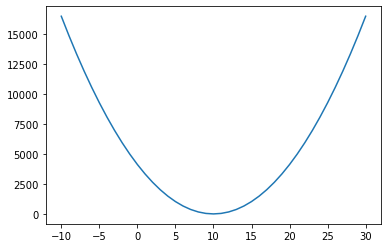

In [21]:
# 그래프 그릴 가중치 범위( -10~30)
weight_arr = range(-10,31)

#비용함수(MSE)값을 담을 리스트 생성
cost_list=[]
for w in weight_arr:
    c = cost(data['시간'],data['성적'],w)
    cost_list.append(c)
    
# 그래프 그리기
plt.plot(weight_arr,cost_list)
plt.show()

- SGDRegressor
- 경사하강법을 사용

In [23]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(
    #가중치가 업데이트 될때 기울기가 0이되면 멈추는데 사실상 없다고 보면된다.
    #정답부근에서 계속 머문다. 천 번동안 정답을 찾아가는 과정을 반복하겠다.
         max_iter = 1000, #가중치 업데이트
         eta0 = 0.01, #학습률, 얼만큼 전진할 것인가
        #학습률이 크면 크게크게 찾아가고 학습률이 작으면 조금조금씩 이동한다.
        #얼만큼 한 번에 찾아갈 것인가 값을 잘 조절해야한다.
        #학습률이 너무 크면 위로 가는 발산을 하는 경우가 발생함
        #학습률이 너무 작으면 정답까지 찾아가는데 시간이 매우 오래 걸림
        #국소지역점에 빠져 버릴 수 있음
         verbose = 1 # 학습과정확인

       )

In [24]:
sgd.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 8.49, NNZs: 1, Bias: 1.207604, T: 4, Avg. loss: 959.643225
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.50, NNZs: 1, Bias: 1.323629, T: 8, Avg. loss: 22.057521
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.72, NNZs: 1, Bias: 1.346364, T: 12, Avg. loss: 1.523383
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.351327, T: 16, Avg. loss: 0.322710
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.81, NNZs: 1, Bias: 1.348677, T: 20, Avg. loss: 0.210055
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.81, NNZs: 1, Bias: 1.343348, T: 24, Avg. loss: 0.191302
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.339149, T: 28, Avg. loss: 0.194562
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.335912, T: 32, Avg. loss: 0.188646
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.331458, T: 36, Avg. loss: 0.188640
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [25]:
print('가중치: ', sgd.coef_)
print('절편', sgd.intercept_)

가중치:  [9.85905624]
절편 [1.00959482]
